In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df['0:1']

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [101]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [100]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [21]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [22]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [27]:
df['trtbps'].head()
df['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

In [24]:
df['chol'].head()

0    233
1    250
2    204
3    236
4    354
Name: chol, dtype: int64

In [25]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [26]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [28]:
df['thalachh'].head()

0    150
1    187
2    172
3    178
4    163
Name: thalachh, dtype: int64

In [30]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

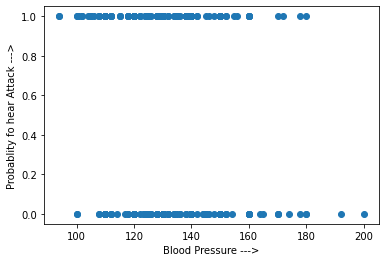

In [54]:
fig,  ax = plt.subplots()
X = df['trtbps']
Y = df['output']
plt.xlabel('Blood Pressure --->')
plt.ylabel('Probablity fo hear Attack --->')
ax.scatter(X, Y)
fig.show

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

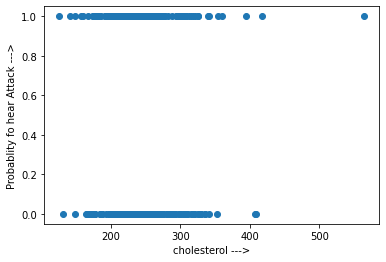

In [52]:
fig,  ax = plt.subplots()
X = df['chol']
Y = df['output']
plt.xlabel('cholesterol --->')
plt.ylabel('Probablity fo hear Attack --->')
ax.scatter(X, Y)
fig.show

In [56]:
#Spliting the data to train and test
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)


124    199
72     204
15     219
10     239
163    175
      ... 
188    233
71     227
106    234
270    249
102    195
Name: chol, Length: 212, dtype: int64

In [69]:
#It seems that the plots cannot show the correlation but it is rational to have correlation between these varibales.
#Lets try Logistic Regresstion to see what happens.
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
yhat = LR.predict(x_test)


In [86]:
from sklearn.metrics import jaccard_score, classification_report, plot_confusion_matrix
jaccard_score(y_test,yhat,pos_label = 1)
report = classification_report(y_test, yhat)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [119]:
#Using Logisitic Regression Method, It is time to try decision method and see how much better or worse is this method
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train = x_train[['sex','cp','fbs', 'restecg', 'exng','oldpeak','slp','caa','thall']]
DT = DecisionTreeClassifier(random_state = 0 )
DT.fit(x_train , y_train)
yhat = DT.predict(x_test)
accuracy_score(y_test , yhat)

0.7252747252747253

In [ ]:
# So it seems that logistioc regression tree wokrs here better than decision tree method